In [1]:
# Check torch version and mps/CUDA status if GPU is enabled.
import torch
print(torch.__version__)
print(torch.cuda.is_available()) # Should return True when GPU is enabled. 

2.5.1
False


In [2]:
# Imports here
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms,models
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import json

/Users/kalra/Documents/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/kalra/Documents/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /Users/kalra/Documents/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/kalra/Documents/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/kalra/Documents/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/kalra/Documents/miniconda3/envs/torch/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/kalra/Documents/miniconda3/envs/torch/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvis

If you do not find the flowers/ dataset in the current directory, /workspace/home/aipnd-project/, you can download it using the following commands.

Method 1

!wget 'https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz'
!unlink flowers
!mkdir flowers && tar -xzf flower_data.tar.gz -C flowers
Method 2

!cp -r /data/ .

In [4]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [5]:
# Define your transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
# Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
validation_data = datasets.ImageFolder(valid_dir, transform=validation_transforms)
test_data = datasets.ImageFolder(valid_dir, transform=test_transforms)

# Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [6]:
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
cat_to_name

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

In [7]:
device="mps" #changed it to cuda if u r on nvidia
model =models.vgg13(pretrained=True)


model.classifier = nn.Sequential(nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=2048, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=2048, out_features=102, bias=True),
  nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
model

/Users/kalra/Documents/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kalra/Documents/miniconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): 

In [8]:
epochs = 5
steps = 0
running_loss = 0
print_every = 10

model.to(device)
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
              
        if steps % print_every == 0:
            validation_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in validationloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    validation_loss += batch_loss.item()
                    
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Validation loss: {validation_loss/len(validationloader):.3f}.. "
                  f"Validation accuracy: {accuracy/len(validationloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/5.. Train loss: 5.473.. Validation loss: 4.452.. Validation accuracy: 0.089
Epoch 1/5.. Train loss: 4.362.. Validation loss: 3.937.. Validation accuracy: 0.154
Epoch 1/5.. Train loss: 3.917.. Validation loss: 3.365.. Validation accuracy: 0.258
Epoch 1/5.. Train loss: 3.585.. Validation loss: 2.746.. Validation accuracy: 0.368
Epoch 1/5.. Train loss: 3.084.. Validation loss: 2.327.. Validation accuracy: 0.430
Epoch 1/5.. Train loss: 2.973.. Validation loss: 1.980.. Validation accuracy: 0.482
Epoch 1/5.. Train loss: 2.582.. Validation loss: 1.798.. Validation accuracy: 0.546
Epoch 1/5.. Train loss: 2.636.. Validation loss: 1.665.. Validation accuracy: 0.563
Epoch 1/5.. Train loss: 2.323.. Validation loss: 1.452.. Validation accuracy: 0.620
Epoch 1/5.. Train loss: 2.256.. Validation loss: 1.391.. Validation accuracy: 0.624
Epoch 2/5.. Train loss: 2.165.. Validation loss: 1.283.. Validation accuracy: 0.652
Epoch 2/5.. Train loss: 2.081.. Validation loss: 1.236.. Validation accuracy

In [9]:
# Do validation on the test set
def test_model(model, testloader, criterion, device="mps"):
    model.to(device)
    model.eval()
    test_loss = 0
    accuracy = 0

    with torch.no_grad():  # No gradient calculation
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            log_ps = model(images)  # Get log-probabilities
            loss = criterion(log_ps, labels)
            test_loss += loss.item()

            ps = torch.exp(log_ps)  # Convert log-prob to probabilities
            top_p, top_class = ps.topk(1, dim=1)  # Get predicted class
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    avg_loss = test_loss / len(testloader)
    avg_accuracy = accuracy / len(testloader)

    print(f"Test Loss: {avg_loss:.3f}")
    print(f"Test Accuracy: {avg_accuracy*100:.2f}%")

    
test_model(model, testloader, criterion, device="mps")

Test Loss: 0.648
Test Accuracy: 84.69%


In [10]:
# Save the checkpoint 
checkpoint = {
    'epochs': epochs,
    'learning_rate': 0.001,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'classifier': model.classifier,  
    'class_to_idx': train_data.class_to_idx
}
torch.save(checkpoint, 'checkpoint.pth')

In [11]:
def load_checkpoint(filepath):
    # Load checkpoint file from disk
    checkpoint = torch.load(filepath) 
    model = models.vgg13(pretrained=True)
    model.classifier = checkpoint['classifier']
    model.load_state_dict(checkpoint['model_state_dict'])
    model.class_to_idx = checkpoint['class_to_idx']
    optimizer = torch.optim.Adam(model.classifier.parameters(), lr=checkpoint['learning_rate'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epochs = checkpoint['epochs']
    
    return model, optimizer, epochs

model, optimizer, start_epoch = load_checkpoint('checkpoint.pth')
print(model,optimizer,start_epoch)

/var/folders/l4/4vx2lxmx5rl2mpc31nbq9pcm0000gn/T/ipykernel_38610/428263040.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): 

In [12]:
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    image = Image.open(image_path).convert("RGB")
    image_transform=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),  # Converts to float and scales [0,255] → [0,1]
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
    ])
    return image_transform(image)

image=process_image('flowers/test/2/image_05100.jpg')

<Axes: >

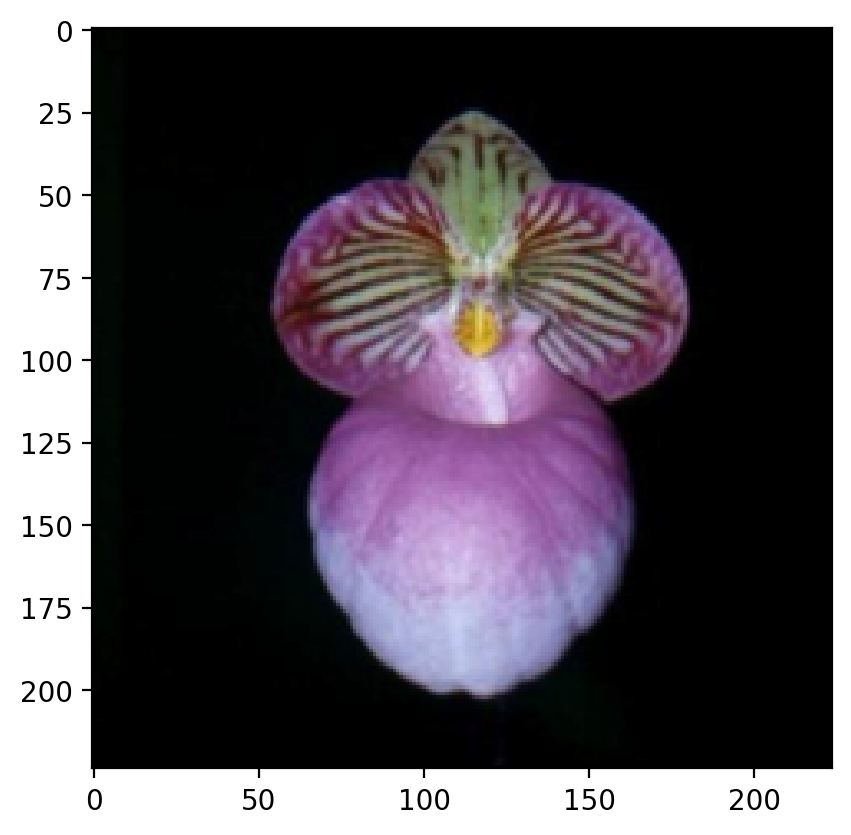

In [16]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)

    if title:
        ax.set_title(title)
    
    return ax

imshow(image)

In [17]:
def predict(image_path, model):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    model.to(device)
    model.eval()
    img = process_image(image_path)
    img = img.unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img)
        ps = torch.exp(output)  # since your model ends in LogSoftmax
        top_p, top_class = ps.topk(5, dim=1)
    return top_p.cpu().numpy().squeeze().tolist(), top_class.cpu().numpy().squeeze().tolist()

In [18]:
probs, classes = predict('flowers/test/1/image_06743.jpg', model)
print(probs)
print(classes)

[0.6098928451538086, 0.22976790368556976, 0.02781052514910698, 0.02727850154042244, 0.018828045576810837]
[84, 0, 70, 100, 99]


['hibiscus', 'pink primrose', 'tree poppy', 'mexican petunia', 'mallow']


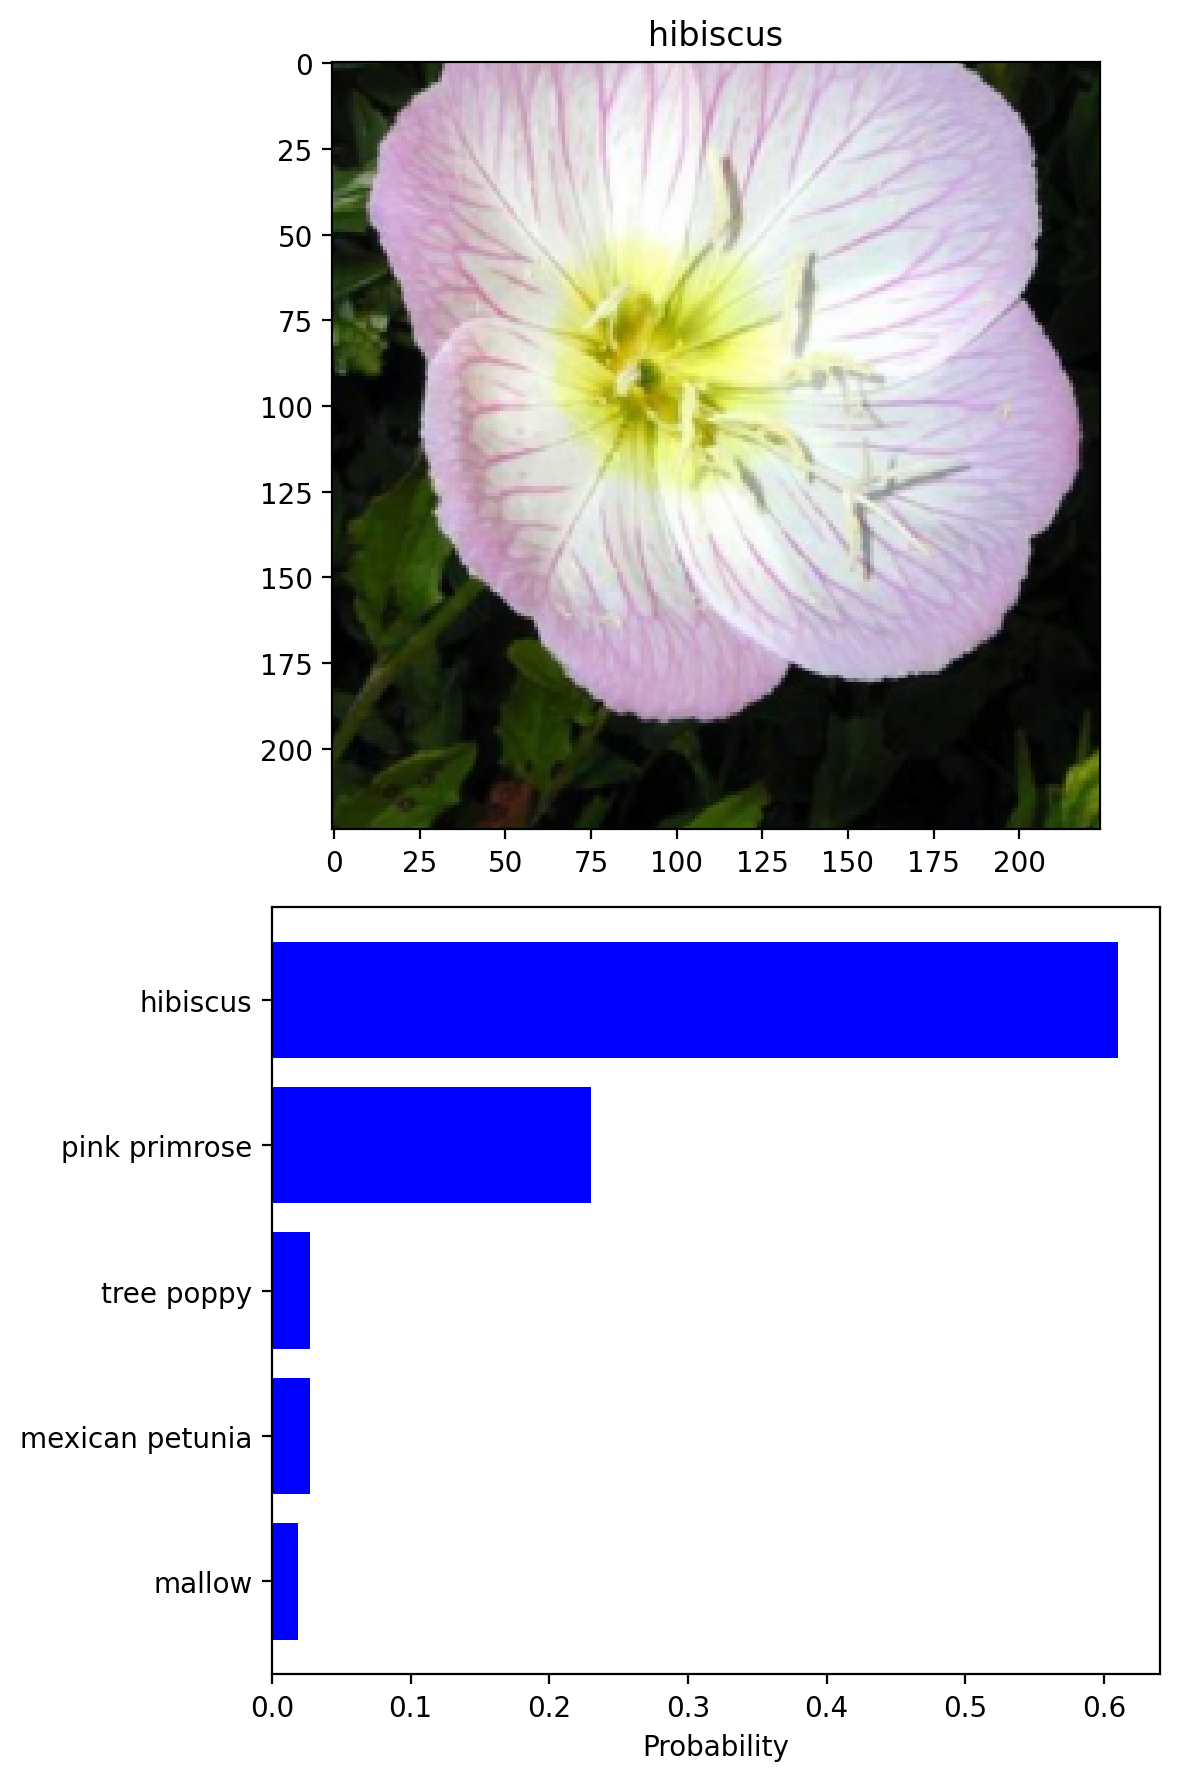

In [19]:
# Display an image along with the top 5 classes
# for predict_class in predict_classes:
#     cat_to_name['0']
image_path ='flowers/test/1/image_06743.jpg' #'flowers/test/2/image_05100.jpg'
idx_to_class = {v: k for k, v in model.class_to_idx.items()}
labels = [cat_to_name[idx_to_class[c]] for c in classes]
    # Process image for display
print(labels)
image_tensor = process_image(image_path)

# Plot image and predictions
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), nrows=2)

imshow(image_tensor, ax=ax1,title=labels[0])  # Top prediction as title

y_pos = np.arange(5)
ax2.barh(y_pos, probs, color="blue")
ax2.set_yticks(y_pos)
ax2.set_yticklabels(labels)
ax2.invert_yaxis()
ax2.set_xlabel('Probability')

plt.tight_layout()
plt.show()